<a href="https://colab.research.google.com/github/shubhro-jyoti/Hotel-Booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [129]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
path = '/content/drive/MyDrive/cc/Hotel Bookings.csv'
df = pd.read_csv(path)

**Objective 1:** To study the given dataset and to clean the datatset.

**Objective 1.1**: To do an initial analysis of the given dataset of hotel booking 

In [132]:
df.shape

(119390, 32)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [134]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [135]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [136]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Objective 1.2**: To find out Null values and cleaning it. 

In [137]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [138]:
df.agent

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [139]:
df.children

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64

In [140]:
df.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [141]:
df.company

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119390, dtype: float64

Since there are a lot of null values in the above dataset under the four columns: children, country, agent and company. Also, the datatype of those columns are not appropriate. Therefore, it is important to clean such values for further analysis of the data.

In [142]:
# Replacing null values with appropriate object type under columns 'children','agent','company'
df[['children','agent','company']] = df[['children','agent','company']].fillna(0)

In [143]:
# Replacing null values with appropriate object type under column 'country'
df['country'] = df['country'].fillna('not applicable')

**Objective 1.3**: Handling duplicates and cleaning it.

In [144]:
# Checking for duplicates
df[df.duplicated()].shape

(31994, 32)

In [145]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [146]:
# shape of the final dataset
df.shape

(87396, 32)

**Objective 1.4**: Converting the columns to appropriate datatype.

As we can see above the datatype of children, company and agent can't be float and hence we need to convert them into int.

In [147]:
df[['children','agent','company']] = df[['children','agent','company']].astype(int)

We also need to change the datatype for the column reservation_status_date to datetime.

In [148]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

In [149]:
# re-check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  b

**Objective 1.5:** Adding some relevant columns.

In [150]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [151]:
df['total_guest'] = df['adults'] + df['children'] + df['babies']

In [152]:
# re-check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  b

In [153]:
# checking if total_guest and total_stay value = 0, which implies cancelled reservations.
df[df['total_stay']==0].shape

(651, 34)

In [154]:
df[df['total_guest']==0].shape

(166, 34)

**Objective 2:** To analyse the dataset and visualise the given data.

**Objective 2.1:** To plot bargraph for number of guests in resort hotels and city hotels for 2015-2017 and make appropriate observations. 

In [157]:
# creating dataframe for number of guests per year from 2015 to 2017 for which bookings are not canceled
df = df.loc[df['is_canceled'] == 0]
num_guests_yearly=df.groupby(['arrival_date_year','hotel'])['arrival_date_year'].count().unstack()
num_guests_yearly

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,5129,5480
2016,18970,12213
2017,13280,8299


Text(0.5, 0, 'Years')

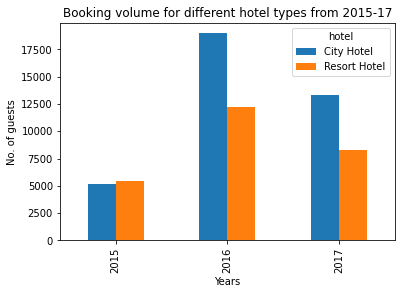

In [158]:
# plotting bar graph for observing the trend of bookings from 2015-17
num_guests_yearly.plot(kind='bar')
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Booking volume for different hotel types from 2015-17')
plt.ylabel('No. of guests')
plt.xlabel('Years')

**Observation(s):** 
1. It is observed that 2015 had the lowest number of guests, among which city hotel guests were the lowest.
2. It is observed that 2016 had the highest number of guests, among which city hotel guests were the highest of all time.
3. It is observed that overall people prefer city hotels than resort hotels.

**Objective 2.2:** To determine the which type of guests (solo, couple or family) made the most number of bookings.

In [159]:
# creating dataframe for solo,couple and family guests
df['solo'] = df['adults'] == 1
df['couple'] = df['adults'] == 2
df['family'] = df['adults'] + df['children'] + df['babies'] >= 3
type_of_guests = ['Solo','Couple','Family']
total_guests = [df['solo'].sum(), df['couple'].sum(), df['family'].sum()]

guests_dataframe = pd.DataFrame(list(zip(type_of_guests,total_guests))).rename(columns = {0:'Type of guests', 1:'Number of guests'})
guests_dataframe

,Type of guests,Number of guests
0,Solo,13294
1,Couple,45836
2,Family,9286


Text(0.5, 1.0, 'Booking volume as per type of guests')

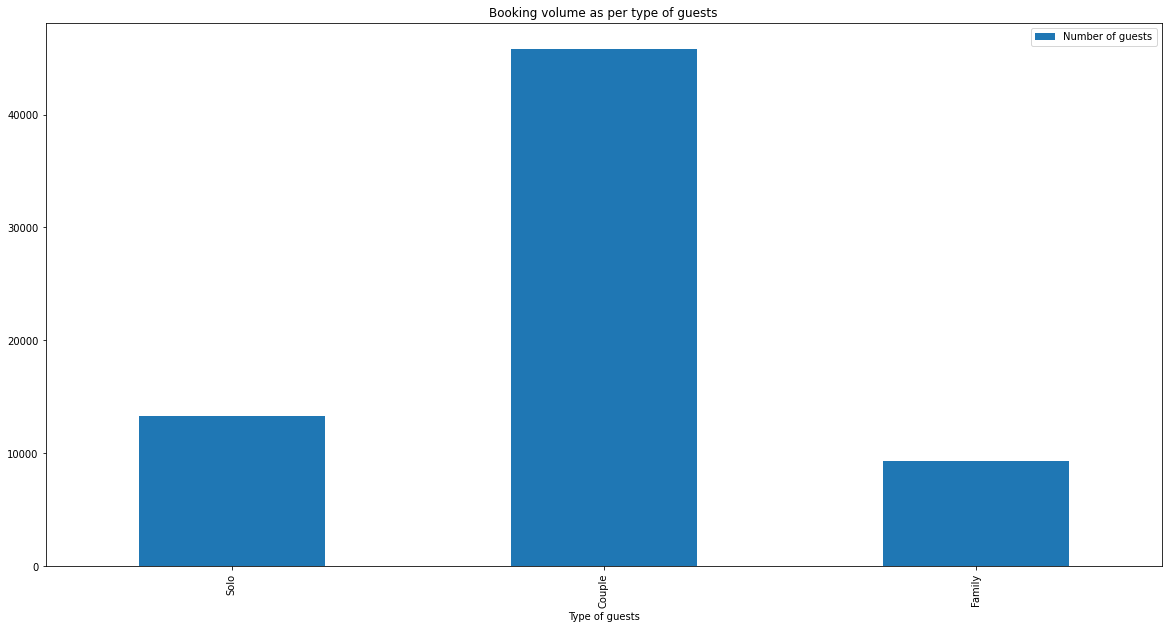

In [160]:
# plotting a bar graph for the different types of guests and booking volumes
guests_dataframe.plot(x = 'Type of guests', y = 'Number of guests',kind='bar')
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Booking volume as per type of guests')

**Observation(s):**
1. It is seen that most bookings were made by couples followed by solo travellers and then by guest who were with family.

**Objective 2.3:** Determining the holiday season or the season in which most guests arrived considering overall data of all 2015-17.

In [177]:
# creating dataframe for number of guests and months 
month_count = df['arrival_date_month'].value_counts().reset_index()
month_count.columns = ['Months','No. of guests']
month_count.sort_values('Months')

,Months,No. of guests
4,April,5499
0,August,7634
10,December,3753
8,February,4683
11,January,3655
1,July,6859
5,June,5411
3,March,5683
2,May,5913
9,November,3941


Text(0.5, 1.0, 'guests across months')

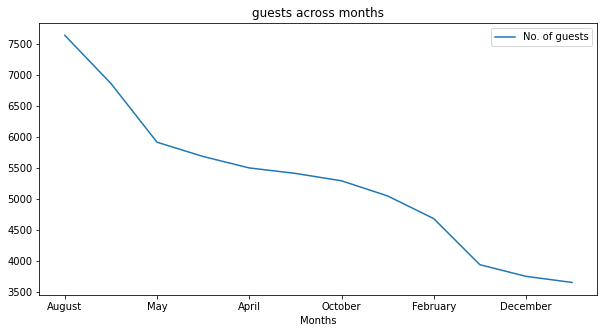

In [179]:
# plotting line graph for above dataframe
month_count.plot(x = 'Months', y = 'No. of guests')

plt.title('guests across months')